# Análise de dados de queimadas no Brasil

#### Author: Romullo Ferreira

O objetivo deste projeto é analisar os dados de queimadas/focos de incêndios no Brasil, que inclui as seguintes etapas:

1. Business Questions (Business Understanding)
2. Data wrangling 
    - 2.1. Gather
    - 2.2. Assess
    - 2.3. Prepare Data (Clean)
3. Data exploration and visualization
4. Data Modeling
5. Conclusions.

Informações úteis sobre os dados:
- 27 estados do Brasil
- coluna diassemchuva: Número de dias sem chuva até a detecção do surto
- coluna riscofogo: Valor de risco de incêndio previsto para o dia em que o foco é detectado
- coluna precipitacao: Valor de precipitação acumulado no dia até o momento em que o surto é detectado
- coluna frp: Fire Radiative Power, MW (megawatts)
- Data da última coleta de dados: 31-03-2022
- Fonte de dados: INPE. Brasil, 2020
- Dados detalhados podem ser baixados em [basedosdados.org](https://basedosdados.org/en/dataset/banco-de-dados-de-queimadas)
- Você também pode acessar o [INPE](https://queimadas.dgi.inpe.br//queimadas/dados-abertos/) para encontrar mais dados

## 1. Business Questions (Business Understanding)

Para este projeto, estava interessado em analisar a situação das queimadas no Brasil. 

Este projeto visa fazer análise e exploração dos dados e construção de algoritmos e modelos de aprendizagem de máquina que possam nos ajudar a entender os dados que foram coletados, descobrir padrões, responder perguntas e avaliar a capacidade de predi-zer o risco de queimadas no Brasil (bioma Amazônia) para datas futuras. 

## 2. Data wrangling

## 2.1. Gather

Primeiramente, vamos importar as bibliotecas necessárias para este projeto.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import zipfile

#from shapely.geometry import Point
#import geopandas as gpd

Importando o arquivo CSV

In [2]:
df_queimadas = pd.read_csv('inpe_2019_2022.csv', sep=';')

In [3]:
df_queimadas.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,3.0,0,"0,3","-28,45","-50,526",31
1,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,2.0,0,"0,3","-28,452","-50,315","7,2"
2,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,MUITOS CAPOES,Mata Atlantica,3.0,0,"0,8","-28,456","-51,226","4,6"
3,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,3.0,0,"0,5","-28,471","-50,463","11,7"
4,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,3.0,0,"0,7","-28,473","-50,475",35


## 2.2. Assess

Aqui nós podemos ver o tamanho original do nosso dataset inicial, 609201 linhas e 12 colunas.

In [4]:
df_queimadas.shape

(609201, 12)

Vamos contar os valores unicos.

In [5]:
df_queimadas.nunique()

datahora          5133
satelite             1
pais                 1
estado              27
municipio         4950
bioma                6
diasemchuva        122
precipitacao       605
riscofogo           12
latitude        185360
longitude       189542
frp              10397
dtype: int64

Vamos dar uma olhada melhor em nosso DataFrame

In [6]:
df_queimadas.head(10)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,3.0,0,"0,3","-28,45","-50,526",31
1,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,2.0,0,"0,3","-28,452","-50,315","7,2"
2,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,MUITOS CAPOES,Mata Atlantica,3.0,0,"0,8","-28,456","-51,226","4,6"
3,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,3.0,0,"0,5","-28,471","-50,463","11,7"
4,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,3.0,0,"0,7","-28,473","-50,475",35
5,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,2.0,0,"0,5","-28,549","-50,35","3,8"
6,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,CRUZ ALTA,Mata Atlantica,3.0,0,"0,5","-28,549","-53,556","11,4"
7,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,SAO JOSE DOS AUSENTES,Mata Atlantica,2.0,0,"0,2","-28,552","-49,967","5,7"
8,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,CRUZ ALTA,Mata Atlantica,3.0,0,"0,5","-28,559","-53,567","8,3"
9,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,SAO JOSE DOS AUSENTES,Mata Atlantica,2.0,0,"0,2","-28,561","-49,965","6,4"


In [7]:
df_queimadas.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
609196    False
609197    False
609198    False
609199    False
609200    False
Length: 609201, dtype: bool

In [8]:
sum(df_queimadas.duplicated())

0

Nenhum dados duplicados

In [9]:
#Algumas informações adicionais
df_queimadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609201 entries, 0 to 609200
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datahora      609200 non-null  object 
 1   satelite      609200 non-null  object 
 2   pais          609200 non-null  object 
 3   estado        609200 non-null  object 
 4   municipio     609200 non-null  object 
 5   bioma         609200 non-null  object 
 6   diasemchuva   589780 non-null  float64
 7   precipitacao  589780 non-null  object 
 8   riscofogo     589780 non-null  object 
 9   latitude      609200 non-null  object 
 10  longitude     609200 non-null  object 
 11  frp           606567 non-null  object 
dtypes: float64(1), object(11)
memory usage: 55.8+ MB


In [10]:
df_queimadas.dtypes

datahora         object
satelite         object
pais             object
estado           object
municipio        object
bioma            object
diasemchuva     float64
precipitacao     object
riscofogo        object
latitude         object
longitude        object
frp              object
dtype: object

In [11]:
df_queimadas.head(5)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,3.0,0,"0,3","-28,45","-50,526",31
1,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,2.0,0,"0,3","-28,452","-50,315","7,2"
2,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,MUITOS CAPOES,Mata Atlantica,3.0,0,"0,8","-28,456","-51,226","4,6"
3,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,3.0,0,"0,5","-28,471","-50,463","11,7"
4,15/08/2019 17:05:00,AQUA_M-T,Brasil,RIO GRANDE DO SUL,BOM JESUS,Mata Atlantica,3.0,0,"0,7","-28,473","-50,475",35


Descobrindo se existe dados nulos.

In [12]:
df_queimadas.isnull().sum()

datahora            1
satelite            1
pais                1
estado              1
municipio           1
bioma               1
diasemchuva     19421
precipitacao    19421
riscofogo       19421
latitude            1
longitude           1
frp              2634
dtype: int64

In [13]:
df_queimadas.sample(10)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
509476,13/08/2021 17:05:00,AQUA_M-T,Brasil,PARA,NOVO PROGRESSO,Amazonia,10.0,"0,1","0,9","-7,49977","-55,35957","14,8"
581432,22/09/2021 16:11:00,AQUA_M-T,Brasil,MINAS GERAIS,PEDRO LEOPOLDO,Cerrado,7.0,"0,1",1,"-19,51256","-43,94845","59,1"
425533,03/09/2020 17:50:00,AQUA_M-T,Brasil,MATO GROSSO,JUINA,Cerrado,81.0,0,1,"-12,148","-59,877","48,2"
290281,11/08/2020 17:45:00,AQUA_M-T,Brasil,AMAZONAS,APUI,Amazonia,29.0,"0,1","0,8","-7,04","-60,075","130,7"
415453,06/10/2021 16:33:00,AQUA_M-T,Brasil,AMAPA,AMAPA,Amazonia,NaN,NaN,NaN,"2,04236","-50,96959","23,1"
267569,17/08/2020 17:01:39,AQUA_M-T,Brasil,PARA,JACAREACANGA,Amazonia,6.0,0,1,"-6,021396861","-57,744430583",NaN
251090,31/07/2020 16:25:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,17.0,0,"0,6","-3,83","-49,977","42,8"
170352,26/08/2019 16:50:00,AQUA_M-T,Brasil,MARANHAO,LORETO,Cerrado,48.0,0,1,"-7,486","-45,297",14
223350,04/11/2019 16:15:00,AQUA_M-T,Brasil,CEARA,BANABUIU,Caatinga,48.0,"0,7",1,"-5,394","-38,926","27,5"
47702,12/08/2019 16:40:00,AQUA_M-T,Brasil,PARA,SAO FELIX DO XINGU,Amazonia,6.0,0,"0,8","-6,496","-52,804",54


## 2.3. Prepare Data (Clean)

Fazer uma cópia do dataframe df_queimadas para a etapa de limpeza

In [14]:
df_clean = df_queimadas.copy()

### Converter dados de string para float

* Precisamos converter os dados das colunas preciptacao, riscofogo, latitude, longitude e frp de string para float.

##### Define

Vamos converter o tipo dos dados das colunas de string pra float

##### Code

In [15]:
# convertendo tipo de dados de algumas colunas de object(string) para float
df_clean['precipitacao'] = (df_clean['precipitacao'].replace(',', '.', regex=True).astype(float))
df_clean['riscofogo'] = (df_clean['riscofogo'].replace(',', '.', regex=True).astype(float))
df_clean['latitude'] = (df_clean['latitude'].replace(',', '.', regex=True).astype(float))
df_clean['longitude'] = (df_clean['longitude'].replace(',', '.', regex=True).astype(float))
df_clean['frp'] = (df_clean['frp'].replace(',', '.', regex=True).astype(float))

##### Test

In [16]:
df_clean.dtypes

datahora         object
satelite         object
pais             object
estado           object
municipio        object
bioma            object
diasemchuva     float64
precipitacao    float64
riscofogo       float64
latitude        float64
longitude       float64
frp             float64
dtype: object

### Missing values (Fixing NaN data values)

* Existe dados nulos em todas as colunas. Mas nas colunas diassemchuva, precipitacao, riscofogo e frp tem mais.

##### Define

Decidimos excluir essas linhas com valores faltantes, pois não temos como conseguir esses dados de outra forma. E também pelo fato de ser um valor pequeno comparado com o total de registros.

##### Code

In [17]:
df_clean.isnull().sum()

datahora            1
satelite            1
pais                1
estado              1
municipio           1
bioma               1
diasemchuva     19421
precipitacao    19421
riscofogo       19421
latitude            1
longitude           1
frp              2634
dtype: int64

In [18]:
#Excluindo os dados faltantes em riscofogo
df_clean = df_clean.dropna(subset=['riscofogo'])

In [19]:
#Excluindo os dados faltantes em frp
df_clean = df_clean.dropna(subset=['frp'])

##### Test

In [20]:
df_clean.isnull().sum()

datahora        0
satelite        0
pais            0
estado          0
municipio       0
bioma           0
diasemchuva     0
precipitacao    0
riscofogo       0
latitude        0
longitude       0
frp             0
dtype: int64

In [21]:
df_clean.shape

(587147, 12)

In [22]:
df_clean.count()

datahora        587147
satelite        587147
pais            587147
estado          587147
municipio       587147
bioma           587147
diasemchuva     587147
precipitacao    587147
riscofogo       587147
latitude        587147
longitude       587147
frp             587147
dtype: int64

## 3. Data exploration and visualization

Gráfico de barras - maioria dos acidentes por bioma

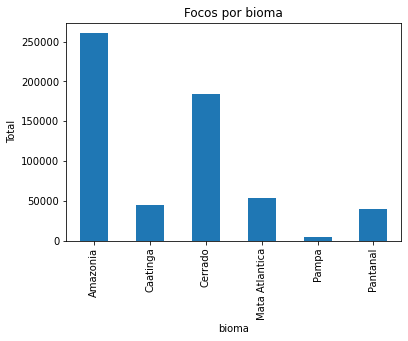

In [23]:
df_clean.groupby(["bioma"])['bioma'].count().plot(kind="bar", title="Focos por bioma")
plt.ylabel('Total');

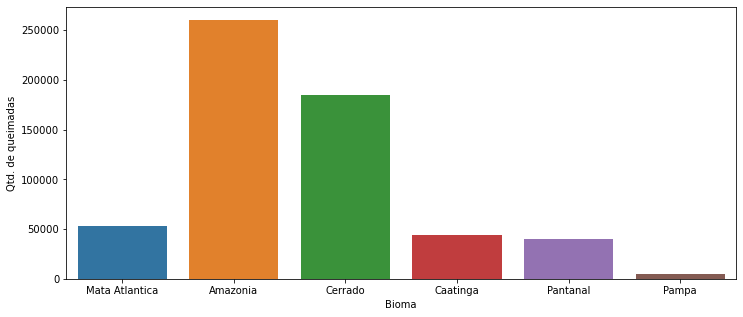

In [24]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='bioma', data=df_clean)
ax.set_xlabel('Bioma')
ax.set_ylabel('Qtd. de queimadas')
plt.show()

In [25]:
biomasCasos = df_clean.groupby('bioma')['bioma'].count().sort_values(ascending=False)
biomasCasos.head(6)

bioma
Amazonia          260295
Cerrado           184791
Mata Atlantica     53522
Caatinga           44281
Pantanal           39766
Pampa               4492
Name: bioma, dtype: int64

In [39]:
#### INICIO BIOMA AMAZONIA #####

In [28]:
# BIOMA AMAZONIA APENAS
df_biomaA = df_clean.copy()

In [29]:
df_biomaA = df_biomaA.query('bioma == "Amazonia"')

In [30]:
df_biomaA.head(3)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
22,15/08/2019 17:10:00,AQUA_M-T,Brasil,AMAZONAS,APUI,Amazonia,6.0,0.0,0.8,-6.870,-59.918,31.8
23,15/08/2019 17:10:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,29.0,0.2,1.0,-6.875,-55.130,26.7
24,15/08/2019 17:10:00,AQUA_M-T,Brasil,AMAZONAS,APUI,Amazonia,8.0,0.0,0.9,-6.909,-59.424,81.9


In [31]:
df_biomaA.shape

(260295, 12)

In [32]:
df_estados_biomaA = df_biomaA.groupby('estado')['estado'].count().sort_values(ascending=False)
df_estados_biomaA.head(10)

estado
PARA           87865
MATO GROSSO    50554
AMAZONAS       43329
RONDONIA       31878
ACRE           24088
MARANHAO       10764
RORAIMA         8093
AMAPA           2671
TOCANTINS       1053
Name: estado, dtype: int64

Text(0.5, 0, 'Total')

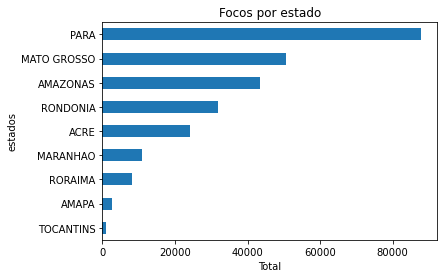

In [33]:
plotinfectedstate = df_biomaA.groupby('estado')['estado'].count().sort_values().tail(15)
plotinfectedstate.plot(kind='barh')
plt.title("Focos por estado")
plt.ylabel("estados")
plt.xlabel("Total")

In [34]:
cidadesCasos = df_biomaA.groupby('municipio')['municipio'].count().sort_values(ascending=False)
cidadesCasos.head(10)

municipio
ALTAMIRA              11255
SAO FELIX DO XINGU    10853
PORTO VELHO           10367
LABREA                 8075
APUI                   6851
NOVO PROGRESSO         6115
COLNIZA                5475
FEIJO                  4070
ITAITUBA               4051
NOVO ARIPUANA          4011
Name: municipio, dtype: int64

Text(0.5, 0, 'Total')

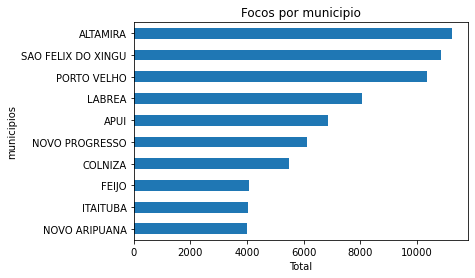

In [35]:
plotinfectedstate = df_biomaA.groupby('municipio')['municipio'].count().sort_values().tail(10)
plotinfectedstate.plot(kind='barh')
plt.title("Focos por municipio")
plt.ylabel("municipios")
plt.xlabel("Total")

In [40]:
#Caso precise instalar as bibliotecas utilizando anaconda segue abaixo
#conda install pandas fiona shapely 

#Você pode instalar em seu ambiente tambem utilizando o comando pip
#pip install geopandas fiona shapely 

import geopandas as gpd
from shapely.geometry import Point

In [41]:
###import shapesfile
df_malhasBr = gpd.read_file('shapefile/BR_Municipios_2021.shp')

In [42]:
df_malhasBr.head(5)

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


In [43]:
df_malhasBr.shape

(5572, 5)

In [44]:
df_malhasBr.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    5572 non-null   object  
 1   NM_MUN    5572 non-null   object  
 2   SIGLA     5572 non-null   object  
 3   AREA_KM2  5572 non-null   float64 
 4   geometry  5572 non-null   geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 217.8+ KB


In [45]:
geometry = [Point(xy) for xy in zip(df_biomaA['longitude'],df_biomaA['latitude'])]

In [46]:
df_cleanA = gpd.GeoDataFrame(df_biomaA, geometry = geometry, crs = df_malhasBr.crs)

In [47]:
df_cleanA.crs.to_string()

'EPSG:4674'

In [48]:
df_cleanA.head(3)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
22,15/08/2019 17:10:00,AQUA_M-T,Brasil,AMAZONAS,APUI,Amazonia,6.0,0.0,0.8,-6.870,-59.918,31.8,POINT (-59.91800 -6.87000)
23,15/08/2019 17:10:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,29.0,0.2,1.0,-6.875,-55.130,26.7,POINT (-55.13000 -6.87500)
24,15/08/2019 17:10:00,AQUA_M-T,Brasil,AMAZONAS,APUI,Amazonia,8.0,0.0,0.9,-6.909,-59.424,81.9,POINT (-59.42400 -6.90900)


In [49]:
df_cleanA.shape

(260295, 13)

<AxesSubplot:>

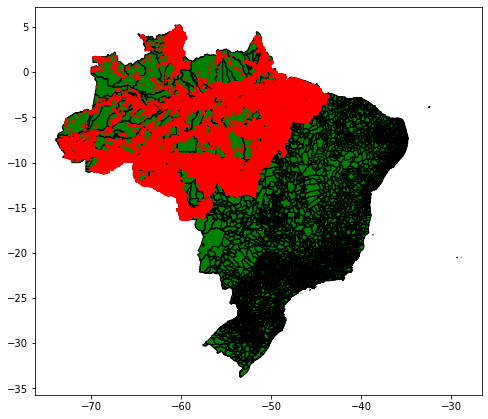

In [53]:
#Plot map 
fig, ax = plt.subplots(figsize=(8,8))

df_malhasBr.plot(ax=ax, color = 'green', edgecolor = 'black')
df_cleanA.plot(ax=ax, markersize = 2, color = 'red')

In [50]:
sum(df_cleanA['riscofogo'] == 1)

71620

In [51]:
df_cleanA_risco_alto = df_cleanA[df_cleanA['riscofogo'] == 1]
df_cleanA_risco_alto.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
23,15/08/2019 17:10:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,29.0,0.2,1.0,-6.875,-55.130,26.7,POINT (-55.13000 -6.87500)
30,15/08/2019 17:10:00,AQUA_M-T,Brasil,RONDONIA,MACHADINHO D'OESTE,Amazonia,39.0,0.0,1.0,-8.950,-61.532,111.0,POINT (-61.53200 -8.95000)
31,15/08/2019 17:10:00,AQUA_M-T,Brasil,RONDONIA,MACHADINHO D'OESTE,Amazonia,41.0,0.0,1.0,-8.952,-62.221,141.0,POINT (-62.22100 -8.95200)
32,15/08/2019 17:10:00,AQUA_M-T,Brasil,RONDONIA,CUJUBIM,Amazonia,41.0,0.0,1.0,-8.953,-62.367,202.7,POINT (-62.36700 -8.95300)
33,15/08/2019 17:10:00,AQUA_M-T,Brasil,RONDONIA,MACHADINHO D'OESTE,Amazonia,40.0,0.0,1.0,-8.957,-62.213,155.8,POINT (-62.21300 -8.95700)


In [56]:
df_cleanA_risco_alto.shape

(71620, 13)

In [52]:
df_cidades_riscoAlto = df_cleanA_risco_alto.groupby('municipio')['municipio'].count().sort_values(ascending=False)
df_cidades_riscoAlto.head(10)

municipio
ALTAMIRA                     4700
SAO FELIX DO XINGU           3885
NOVO PROGRESSO               3180
COLNIZA                      3031
PORTO VELHO                  2954
LABREA                       2119
ARIPUANA                     1664
GAUCHA DO NORTE              1288
CARACARAI                    1185
SANTA MARIA DAS BARREIRAS    1161
Name: municipio, dtype: int64

Text(0.5, 0, 'Total')

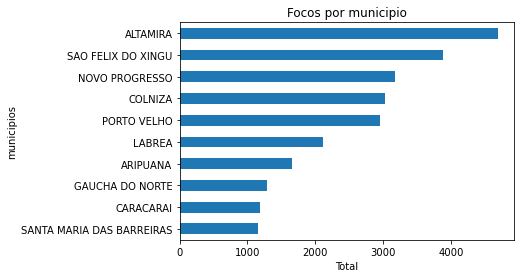

In [53]:
plotinfectedstate = df_cleanA_risco_alto.groupby('municipio')['municipio'].count().sort_values().tail(10)
plotinfectedstate.plot(kind='barh')
plt.title("Focos por municipio")
plt.ylabel("municipios")
plt.xlabel("Total")

<AxesSubplot:>

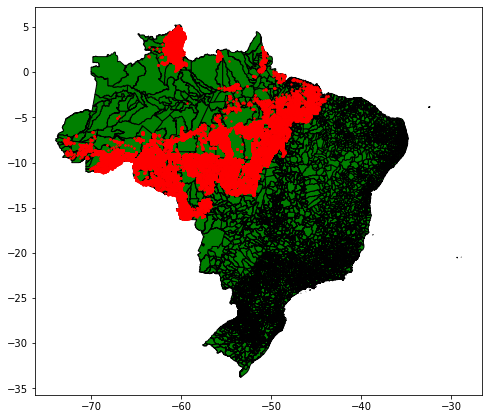

In [59]:
#Plot map 
fig, ax = plt.subplots(figsize=(8,8))

df_malhasBr.plot(ax=ax, color = 'green', edgecolor = 'black')
df_cleanA_risco_alto.plot(ax=ax, markersize = 2, color = 'red')

### Juntando os dados das queimadas com dados das malhas Municipio do Brasil  (Fonte: IBGE) 

In [54]:
df_join = gpd.sjoin(df_cleanA, df_malhasBr, op='within')

In [55]:
df_join.sample(5)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry,index_right,CD_MUN,NM_MUN,SIGLA,AREA_KM2
365346,24/09/2020 18:10:00,AQUA_M-T,Brasil,ACRE,ACRELANDIA,Amazonia,2.0,3.6,1.0,-10.10700,-66.95000,15.6,POINT (-66.95000 -10.10700),52,1200013,Acrelândia,AC,1811.613
474404,12/08/2021 18:00:00,AQUA_M-T,Brasil,RONDONIA,CANDEIAS DO JAMARI,Amazonia,50.0,0.0,1.0,-8.74026,-63.02994,186.6,POINT (-63.02994 -8.74026),31,1100809,Candeias do Jamari,RO,6843.868
368244,07/09/2020 17:25:00,AQUA_M-T,Brasil,MATO GROSSO,ARIPUANA,Amazonia,10.0,0.0,1.0,-9.91600,-60.40000,296.7,POINT (-60.40000 -9.91600),5197,5101407,Aripuanã,MT,24678.135
456557,14/09/2020 17:35:00,AQUA_M-T,Brasil,RONDONIA,CUJUBIM,Amazonia,2.0,0.7,0.3,-8.96300,-62.45200,26.6,POINT (-62.45200 -8.96300),34,1100940,Cujubim,RO,3863.946
460064,06/10/2020 17:00:00,AQUA_M-T,Brasil,PARA,PACAJA,Amazonia,7.0,0.1,0.4,-3.95700,-51.24600,15.6,POINT (-51.24600 -3.95700),237,1505486,Pacajá,PA,11832.323


In [56]:
df_join.shape

(260281, 18)

In [57]:
df_join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 260281 entries, 22 to 497514
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   datahora      260281 non-null  object  
 1   satelite      260281 non-null  object  
 2   pais          260281 non-null  object  
 3   estado        260281 non-null  object  
 4   municipio     260281 non-null  object  
 5   bioma         260281 non-null  object  
 6   diasemchuva   260281 non-null  float64 
 7   precipitacao  260281 non-null  float64 
 8   riscofogo     260281 non-null  float64 
 9   latitude      260281 non-null  float64 
 10  longitude     260281 non-null  float64 
 11  frp           260281 non-null  float64 
 12  geometry      260281 non-null  geometry
 13  index_right   260281 non-null  int64   
 14  CD_MUN        260281 non-null  object  
 15  NM_MUN        260281 non-null  object  
 16  SIGLA         260281 non-null  object  
 17  AREA_KM2      260281

In [58]:
df_join.count()

datahora        260281
satelite        260281
pais            260281
estado          260281
municipio       260281
bioma           260281
diasemchuva     260281
precipitacao    260281
riscofogo       260281
latitude        260281
longitude       260281
frp             260281
geometry        260281
index_right     260281
CD_MUN          260281
NM_MUN          260281
SIGLA           260281
AREA_KM2        260281
dtype: int64

In [59]:
df_join.isnull().sum()

datahora        0
satelite        0
pais            0
estado          0
municipio       0
bioma           0
diasemchuva     0
precipitacao    0
riscofogo       0
latitude        0
longitude       0
frp             0
geometry        0
index_right     0
CD_MUN          0
NM_MUN          0
SIGLA           0
AREA_KM2        0
dtype: int64

In [60]:
sum(df_join.duplicated())

0

In [61]:
df_join.sample(2)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry,index_right,CD_MUN,NM_MUN,SIGLA,AREA_KM2
318151,30/08/2020 18:12:49,AQUA_M-T,Brasil,RONDONIA,PORTO VELHO,Amazonia,0.0,0.4,0.1,-9.58100,-64.41800,180.2,POINT (-64.41800 -9.58100),16,1100205,Porto Velho,RO,34090.952
509971,05/08/2021 17:54:00,AQUA_M-T,Brasil,PARA,ALTAMIRA,Amazonia,23.0,0.0,0.9,-6.28447,-54.01442,136.5,POINT (-54.01442 -6.28447),158,1500602,Altamira,PA,159533.306


In [62]:
#Excluindo algumas colunas que não utilizaremos
df_join.drop(["NM_MUN", "index_right", "geometry", "satelite", "pais"], axis=1, inplace=True)

In [63]:
df_join.head(2)

,datahora,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,CD_MUN,SIGLA,AREA_KM2
22,15/08/2019 17:10:00,AMAZONAS,APUI,Amazonia,6.0,0.0,0.8,-6.870,-59.918,31.8,1300144,AM,54240.545
24,15/08/2019 17:10:00,AMAZONAS,APUI,Amazonia,8.0,0.0,0.9,-6.909,-59.424,81.9,1300144,AM,54240.545


In [64]:
# Apenas valores positivos para riscofogo e diasemchuva
df_fina = df_join[df_join['riscofogo'] >= 0]
df_final = df_fina[df_fina['diasemchuva'] >= 0]
df_final.shape

(257931, 13)

# 4. Data Modeling

In [65]:
df_final.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,AREA_KM2
count,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000
mean,13.829881,1.182337,0.577716,-7.210240,-57.925889,64.635019,29102.265713
std,21.729536,3.823899,0.379038,3.773396,6.764049,157.086952,35879.490515
min,0.000000,0.000000,0.000000,-16.288000,-73.673660,0.000000,147.954000
25%,2.000000,0.000000,0.200000,-9.762000,-62.939445,14.900000,6466.223000
50%,5.000000,0.000000,0.700000,-7.968550,-57.289260,27.700000,14433.775000
75%,16.000000,0.400000,1.000000,-4.273645,-52.710305,58.400000,34090.952000
max,120.000000,143.000000,1.000000,5.152560,-43.717000,8589.800000,159533.306000


### 4.1 Experimento 1

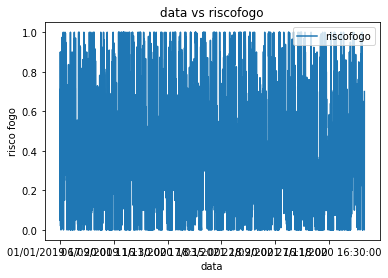

In [66]:
df_ml = df_final.copy()
df_linear = df_ml.filter(["datahora","riscofogo"], axis=1)
df_grouped = df_linear.groupby(["datahora"], as_index=False)
df_grouped = pd.DataFrame(df_grouped.mean())
df_grouped.plot(x='datahora', y='riscofogo', style='-')
plt.title('data vs riscofogo')
plt.xlabel('data')
plt.ylabel('risco fogo')
plt.show()

In [67]:
df_ml['datahora'] = pd.to_datetime(df_ml['datahora'])
df_ml["datahora"].info()

<class 'pandas.core.series.Series'>
Int64Index: 257931 entries, 22 to 497514
Series name: datahora
Non-Null Count   Dtype         
--------------   -----         
257931 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.9 MB


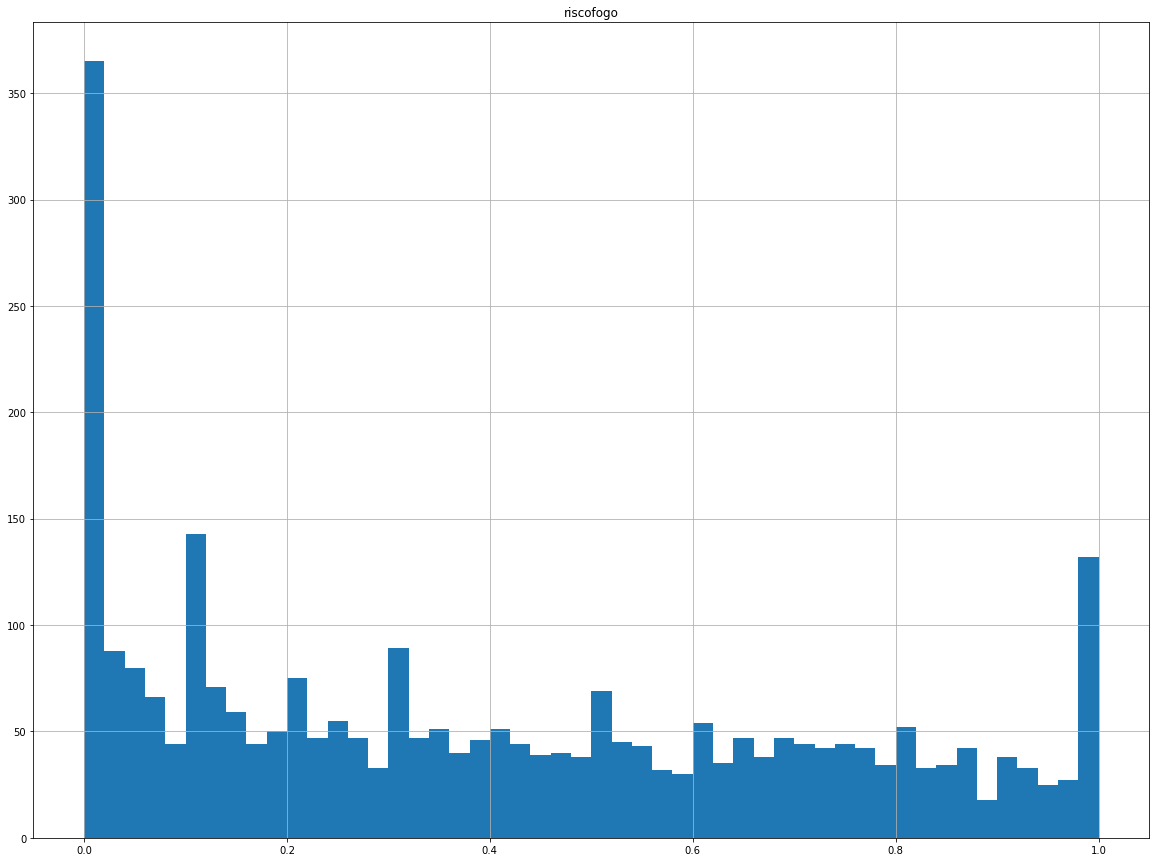

datahora     0
riscofogo    0
dtype: int64

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
df_grouped.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()
#df_grouped.dropna()
df_grouped.describe()
df_grouped.isnull().sum()

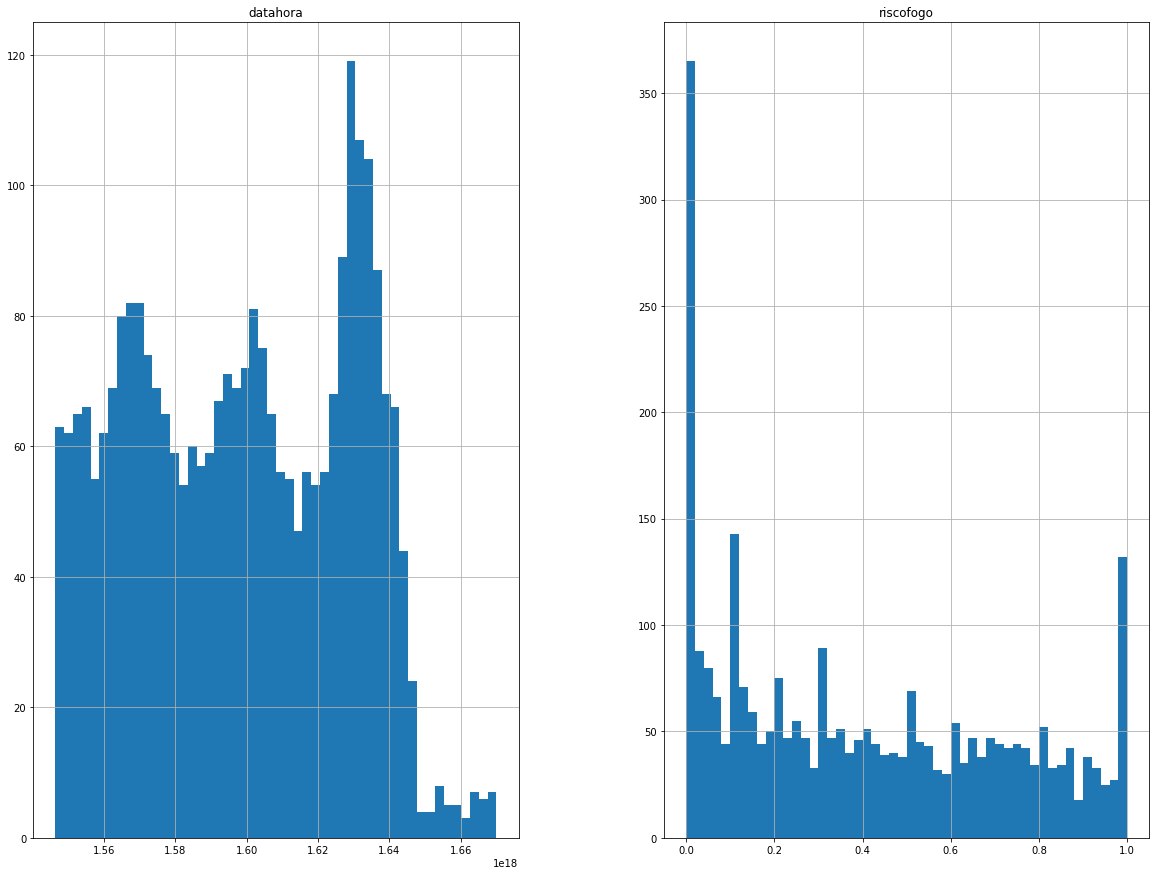

dtype('float64')

In [69]:
from datetime import datetime

df_cliped = df_grouped.clip(upper=pd.Series({'riscofogo': 1.0, 'datahora': datetime.strptime('2050-01-01', '%Y-%m-%d')}), axis=1)
df_cliped['datahora'] = pd.to_datetime(df_cliped['datahora']).values.astype(float)
df_cliped['riscofogo'] = df_cliped['riscofogo'].astype(float)

df_cliped.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots_cliped")
plt.show()
df_cliped["riscofogo"].dtype


In [76]:
#df_final['diasemchuva'].corr(df_final['riscofogo'])

In [70]:
corr_matrix1 = df_ml.corr().abs()
corr_matrix1 = corr_matrix1['riscofogo'].sort_values()
print('Risco Fogo')
display(corr_matrix1)

Risco Fogo


longitude       0.043686
frp             0.122052
AREA_KM2        0.167426
latitude        0.168280
precipitacao    0.379536
diasemchuva     0.506518
riscofogo       1.000000
Name: riscofogo, dtype: float64

In [78]:
#Vamos ver a correlação graficamente - Matriz de correlação
#f, ax = plt.subplots(figsize=(10, 8))
#sns.heatmap(corr_matrix1, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

In [71]:
#Fazendo os imports da biblioteca sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [72]:
#Criação das variáveis "X" e "y
X = df_cliped.iloc[:, :-1].values # todas as colunas menos a ultima
y = df_cliped.iloc[:, 1].values # só a ultima

In [73]:
#Divisão da base de dados entre teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 4.1.1. Modelo 1

In [74]:
#Criação e trinamento do modelo 1
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [75]:
#Previsões utilizando a base de teste
y_pred_model1 = model1.predict(X_test)
#print("Acurácia de previsão: ", accuracy_score(y_test, y_pred))
#pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(y_pred_model1)

In [76]:
#Métricas de avaliação do Modelo 1 - Cálculo do erro
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_model1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_model1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model1)))

Mean Absolute Error: 0.2760667653955196
Mean Squared Error: 0.10042313792600699
Root Mean Squared Error: 0.31689609957525033


### 4.1.2. Modelo 2

In [77]:
#Criação e trinamento do modelo 2
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train, y_train)

#Previsões utilizando a base de teste
y_pred_model2 = model2.predict(X_test)

In [78]:
#Métricas de avaliação do Modelo 2
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_model2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_model2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model2)))

Mean Absolute Error: 0.2798901214909034
Mean Squared Error: 0.12935916799784417
Root Mean Squared Error: 0.35966535557076407


### 4.1.3. Modelo 3

In [79]:
#Criação e trinamento do modelo 3
model3 = ensemble.GradientBoostingRegressor()
model3.fit(X_train, y_train)

#Previsões utilizando a base de teste
y_pred_model3 = model3.predict(X_test)

In [80]:
#Métricas de avaliação do Modelo 3
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_model3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_model3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_model3)))

Mean Absolute Error: 0.2556849259031889
Mean Squared Error: 0.09232295627676414
Root Mean Squared Error: 0.3038469290230924


In [81]:
# print([X_test[:,0].ndim,
#      y_test.ndim,
#      y_pred_model2.ndim])

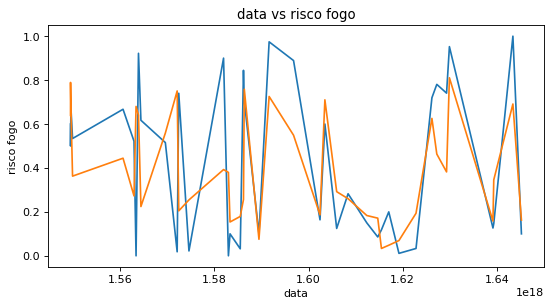

In [83]:
first_x_rows = 40
df_real = pd.DataFrame({
    'datahora': X_test[:first_x_rows,0],
    'riscofogo': y_test[:first_x_rows]
    }).sort_values(by=['datahora'])

df_pred = pd.DataFrame({
    'datahora': X_test[:first_x_rows,0],
    'riscofogo': y_pred_model2[:first_x_rows]
    }).sort_values(by=['datahora'])


from matplotlib.pyplot import figure
figure(figsize=(8, 4)
       , dpi=80)

plt.plot(df_real["datahora"], df_real["riscofogo"], label = "real data")
plt.plot(df_pred["datahora"], df_pred["riscofogo"], label = "predicted data")
plt.title('data vs risco fogo')
plt.xlabel('data')
plt.ylabel('risco fogo')
plt.show()

In [84]:
#my_array = np.array([[11,22,33],[44,55,66]])

#df_df = pd.DataFrame(X_test, columns = ['col1'])

#print(df_df)
#print(type(df_df))

### 4.2. Experimento 2

In [85]:
df_final2 = df_final.copy()
#df_encoded = (df_final2.copy())

In [86]:
df_final.shape

(257931, 13)

In [87]:
df_final2.shape

(257931, 13)

In [88]:
#df_encoded.tail(10)

In [89]:
def encode_estado(df_final2):
    '''
    One hot encode estados dataframe df_final2 
    
    INPUT:
    municipios - estados do bioma Amazonia para serem encoded
    
    OUTPUT:
    municipios - dataframe com one hot encode nos estados do bioma Amazonia
    
    '''
     # one-hot encode channels column
    estados = ['PARA', 'MATO GROSSO', 'RONDONIA', 'ACRE', 'MARANHAO', 'RORAIMA', 'AMAZONAS', 'TOCANTINS']

    for estado in estados:
        df_final2[estado] = df_final2.estado.apply(lambda x: estado in x)*1
        
    # Drop original columns
    #df_final2.drop(['municipio'],axis=1 ,inplace=True)
    
    #for col in ["email", "mobile", "social", "web"]:
    #    df_final2.rename(columns={col: ("channel_" + col)}, inplace=True)

    
    return df_final2

In [90]:
df_encoded = encode_estado(df_final2.copy())

In [91]:
#Exclusão de algumas colunas que não vamos utilizar
df_encoded.drop(["bioma", "municipio", "SIGLA", "CD_MUN"], axis=1, inplace=True)

In [92]:
df_encoded.tail(5)

,datahora,estado,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,AREA_KM2,PARA,MATO GROSSO,RONDONIA,ACRE,MARANHAO,RORAIMA,AMAZONAS,TOCANTINS
548404,09/09/2021 16:48:00,TOCANTINS,6.0,0.0,1.0,-9.23414,-48.71741,130.6,1033.301,0,0,0,0,0,0,0,1
548406,09/09/2021 16:48:00,TOCANTINS,5.0,0.0,1.0,-9.23274,-48.70706,112.1,1033.301,0,0,0,0,0,0,0,1
465406,06/09/2020 16:45:00,TOCANTINS,98.0,0.0,1.0,-9.24300,-48.77000,43.2,3747.645,0,0,0,0,0,0,0,1
497512,12/08/2021 16:22:00,MARANHAO,11.0,0.1,1.0,-5.38315,-47.00475,15.9,820.968,0,0,0,0,1,0,0,0
497514,12/08/2021 16:22:00,MARANHAO,11.0,0.2,1.0,-5.37879,-46.99350,52.5,820.968,0,0,0,0,1,0,0,0


In [93]:
#Exclusão de colunas que não iremos utilizar
df_encoded.drop(["estado", "AREA_KM2"], axis=1, inplace=True)

In [94]:
df_encoded.sample(10)

,datahora,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,PARA,MATO GROSSO,RONDONIA,ACRE,MARANHAO,RORAIMA,AMAZONAS,TOCANTINS
148529,10/09/2019 17:45:00,2.0,1.3,0.2,-9.36700,-56.94000,123.9,0,1,0,0,0,0,0,0
253074,01/08/2020 17:10:00,18.0,0.0,0.8,-5.79900,-57.70500,24.5,1,0,0,0,0,0,0,0
421998,18/08/2021 17:24:00,4.0,0.0,0.6,-6.04086,-53.22702,49.6,1,0,0,0,0,0,0,0
135572,14/09/2019 17:20:00,20.0,0.0,1.0,-11.30600,-53.94200,32.0,0,1,0,0,0,0,0,0
446578,03/10/2021 17:34:00,1.0,0.0,0.2,-11.07493,-58.90463,42.6,0,1,0,0,0,0,0,0
327710,08/10/2020 16:45:00,2.0,0.0,1.0,-7.77900,-49.98800,23.6,1,0,0,0,0,0,0,0
509255,11/08/2021 17:17:00,8.0,0.0,0.9,-6.19547,-52.72557,184.5,1,0,0,0,0,0,0,0
201932,07/11/2020 17:00:00,0.0,4.4,0.0,-2.99200,-51.55800,15.2,1,0,0,0,0,0,0,0
22945,03/08/2019 18:20:00,10.0,0.0,0.9,-9.93900,-67.77700,11.3,0,0,0,1,0,0,0,0
525990,26/06/2021 17:00:00,36.0,0.0,0.8,-12.06400,-54.01900,17.5,0,1,0,0,0,0,0,0


In [95]:
#df_encoded.shape

In [96]:
#df_query2 = df_final.query('estado == "MARANHAO"')
#df_query2.head()

In [97]:
#df_query = df_encoded.query('MARANHAO == 1')
#df_query.head()

In [98]:
df_encoded.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,PARA,MATO GROSSO,RONDONIA,ACRE,MARANHAO,RORAIMA,AMAZONAS,TOCANTINS
count,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000,257931.000000
mean,13.829881,1.182337,0.577716,-7.210240,-57.925889,64.635019,0.338191,0.195669,0.123048,0.093277,0.038347,0.031299,0.166622,0.004055
std,21.729536,3.823899,0.379038,3.773396,6.764049,157.086952,0.473095,0.396715,0.328493,0.290821,0.192034,0.174125,0.372639,0.063552
min,0.000000,0.000000,0.000000,-16.288000,-73.673660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.200000,-9.762000,-62.939445,14.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.700000,-7.968550,-57.289260,27.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,0.400000,1.000000,-4.273645,-52.710305,58.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,120.000000,143.000000,1.000000,5.152560,-43.717000,8589.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


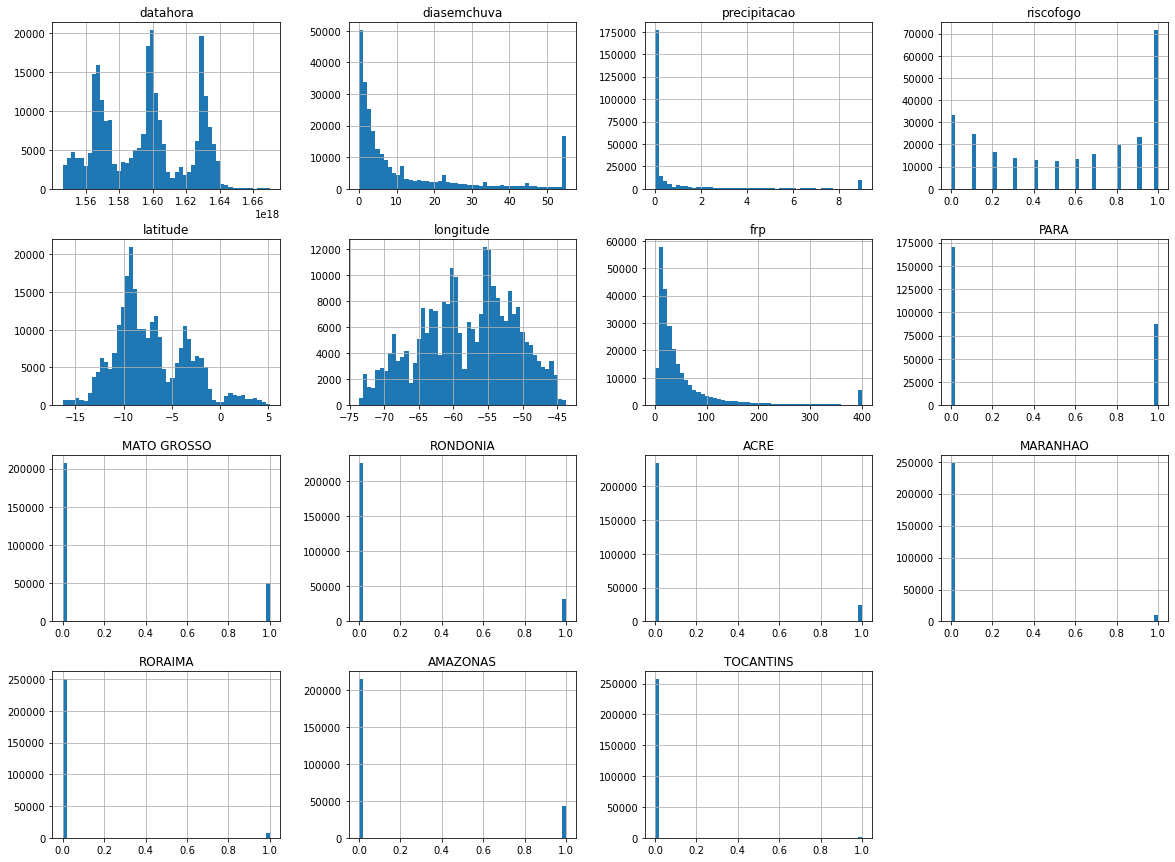

In [99]:
#Plotando um Histograma pra cada atributo numérico
from datetime import datetime

df_cliped2 = df_encoded.clip(upper=pd.Series({'riscofogo': 1.0, 'diasemchuva': 55.0, 
                                              'precipitacao': 9.0, 'latitude': 10000000.0, 'longitude': 10000000.0, 
                                              'frp': 400.0, 'PARA': 1.0, 'MATO GROSSO': 1.0, 'AMAZONAS': 1.0, 'RONDONIA': 1.0, 
                                              'ACRE': 1.0, 'MARANHAO': 1.0, 'RORAIMA': 1.0, 'TOCANTINS': 1.0,
                                              'datahora': datetime.strptime('2050-01-01', '%Y-%m-%d')}), axis=1)

df_cliped2['datahora'] = pd.to_datetime(df_cliped2['datahora']).values.astype(float)
df_cliped2['riscofogo'] = df_cliped2['riscofogo'].astype(float)
df_cliped2['precipitacao'] = df_cliped2['precipitacao'].astype(float)
df_cliped2['latitude'] = df_cliped2['latitude'].astype(float)
df_cliped2['longitude'] = df_cliped2['longitude'].astype(float)
df_cliped2['frp'] = df_cliped2['frp'].astype(float)
df_cliped2['PARA'] = df_cliped2['PARA'].astype(float)
df_cliped2['MATO GROSSO'] = df_cliped2['MATO GROSSO'].astype(float)
df_cliped2['AMAZONAS'] = df_cliped2['AMAZONAS'].astype(float)
df_cliped2['RONDONIA'] = df_cliped2['RONDONIA'].astype(float)
df_cliped2['ACRE'] = df_cliped2['ACRE'].astype(float)
df_cliped2['MARANHAO'] = df_cliped2['MARANHAO'].astype(float)
df_cliped2['RORAIMA'] = df_cliped2['RORAIMA'].astype(float)
df_cliped2['TOCANTINS'] = df_cliped2['TOCANTINS'].astype(float)

df_cliped2.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots_cliped")
plt.show()

In [100]:
#Criação das variáveis "X" e "y
y2 = df_cliped2["riscofogo"].values # só a ultima
X2 = df_cliped2.drop(["riscofogo"], axis=1).values # todas as colunas menos a ultima


#Divisão da base de dados entre teste e treinamento
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [101]:
#X_train[:10]

In [102]:
#Criação e trinamento do modelo 1
model = LinearRegression()
model.fit(X_train2, y_train2)

#Previsões utilizando a base de teste
y_pred = model.predict(X_test2)
#print("Acurácia de previsão: ", accuracy_score(y_test, y_pred))
#pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(y_pred_model1)

#Métricas de avaliação do Modelo 1 - Cálculo do erro
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))

Mean Absolute Error: 0.2632073294463366
Mean Squared Error: 0.09315515804961567
Root Mean Squared Error: 0.3052132992672758


In [117]:
#Criação e trinamento do modelo 2
modelm = RandomForestRegressor(random_state=42)
modelm.fit(X_train2, y_train2)

#Previsões utilizando a base de teste
y_predm = modelm.predict(X_test2)

#Métricas de avaliação do Modelo 2
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_predm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_predm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_predm)))

Mean Absolute Error: 0.07929080970011824
Mean Squared Error: 0.01896406941671351
Root Mean Squared Error: 0.1377100919203582


In [104]:
#Criação e trinamento do modelo 3
model = ensemble.GradientBoostingRegressor()
model.fit(X_train2, y_train2)

#Previsões utilizando a base de teste
y_pred = model.predict(X_test2)

#Métricas de avaliação do Modelo 3
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred)))

Mean Absolute Error: 0.1519072582690306
Mean Squared Error: 0.04235869466892628
Root Mean Squared Error: 0.20581228017036854


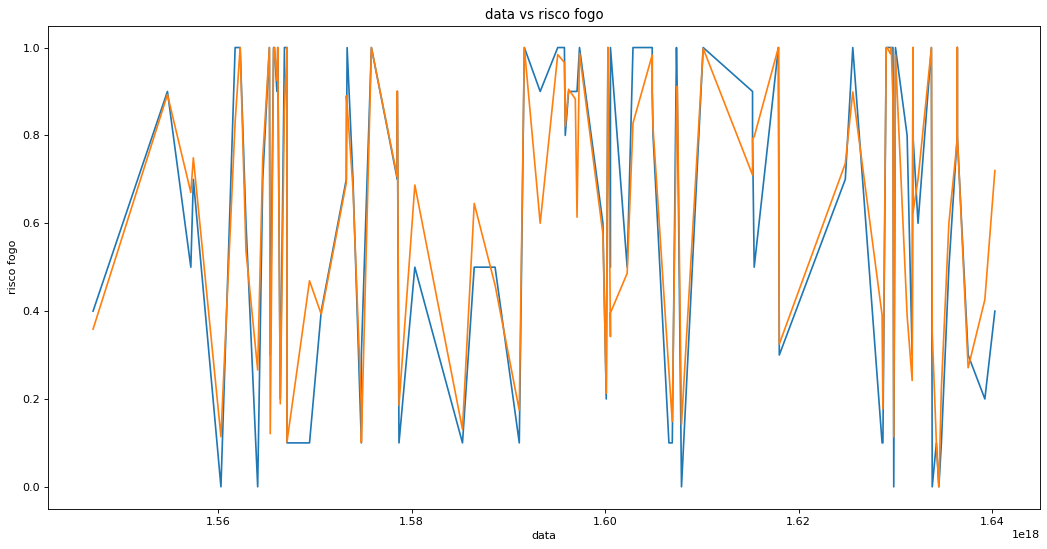

In [105]:
#Plot MODELO 2 - RandomForestRegressor - Experimento 2

row_min = 500
row_max = 600
df_real = pd.DataFrame({
    'datahora': X_test2[row_min:row_max,0],
    'riscofogo': y_test2[row_min:row_max]
    }).sort_values(by=['datahora'])

df_pred = pd.DataFrame({
    'datahora': X_test2[row_min:row_max,0],
    'riscofogo': y_predm[row_min:row_max]
    }).sort_values(by=['datahora'])


from matplotlib.pyplot import figure
figure(figsize=(16, 8)
       , dpi=80)

plt.plot(df_real["datahora"], df_real["riscofogo"], label = "real data")
plt.plot(df_pred["datahora"], df_pred["riscofogo"], label = "predicted data")
plt.title('data vs risco fogo')
plt.xlabel('data')
plt.ylabel('risco fogo')
plt.show()

Feature: 0, Score: 0.11693
Feature: 1, Score: 0.46439
Feature: 2, Score: 0.13925
Feature: 3, Score: 0.11968
Feature: 4, Score: 0.10477
Feature: 5, Score: 0.03379
Feature: 6, Score: 0.00539
Feature: 7, Score: 0.00125
Feature: 8, Score: 0.00104
Feature: 9, Score: 0.00043
Feature: 10, Score: 0.00262
Feature: 11, Score: 0.00055
Feature: 12, Score: 0.00974
Feature: 13, Score: 0.00018


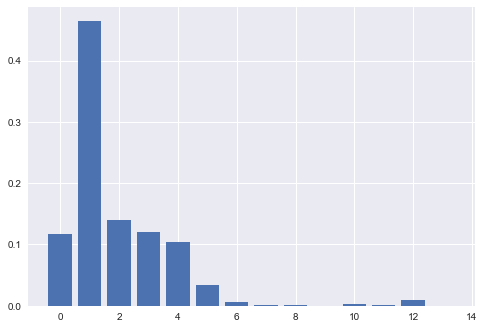

In [109]:
# Get importance
importance = modelm.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# 5. Resultados

Neste projeto implementamos três modelos de machine learning com o propósito de prever risco de fogo no Brasil, no bioma Amazônia. Após os treinos e testes dos modelos conseguimos avaliar cada modelo duas vezes em dois experimentos realizados. Em um primeiro experimento escolhemos apenas um atributo, “riscofogo” e “datahora”, e após a avaliação dos modelos, chegamos à conclusão de que o modelo “Gradient Boosting Regressor” teve um melhor desempenho neste primeiro experimento, porém o resultado não foi tão bom quanto deveria. 

Percebendo que dava para melhorar, realizamos um segundo experimento, mas dessa vez foi fundamental ter selecionado mais atributos e então conseguimos uma melhora significativa e perceptiva. 

Concluiu-se que o modelo de Regressão Random Forest no segundo experimento apresentou uma menor taxa de erro, obtendo o melhor resultado nas métricas, e uma capacidade de prever os resultados semelhantes aos dados reais como foi possível ver em um gráfico mostrado mais acima.

Por fim plotamos um gráfico de feature importance e pudemos observar que a segunda feature, a feature 1 (diasemchuva) mostrou ser mais relevante, e isso só pode ser percebida após a realização do segundo experimento. 

In [120]:
from sklearn.model_selection import learning_curve
train_sizes = list(range(1, 25))

train_sizes, train_scores, validation_scores = learning_curve(
estimator = modelm,
X = X_train2,
y = y_train2, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

#print('Training scores:\n\n', train_scores)
#print('\n', '-' * 70) # separator to make the output easy to read
#print('\nValidation scores:\n\n', validation_scores)

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
#print('Mean', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
#Mean training scores

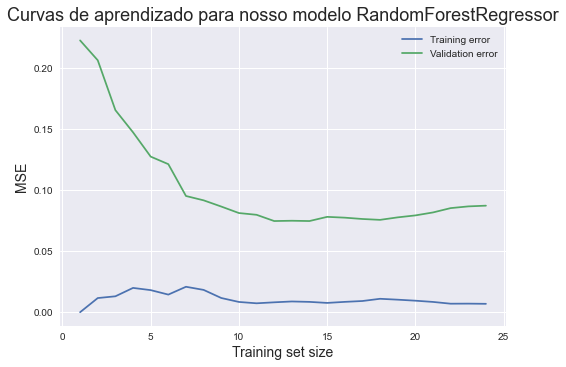

In [121]:
#Curvas de Aprendizado para o Modelo RandomForestRegressor

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Curvas de aprendizado para nosso modelo RandomForestRegressor', fontsize = 18)
plt.legend()
#plt.ylim(0,40)